In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import empymod

sys.path.append('../')
import emulatte.forward as fwd

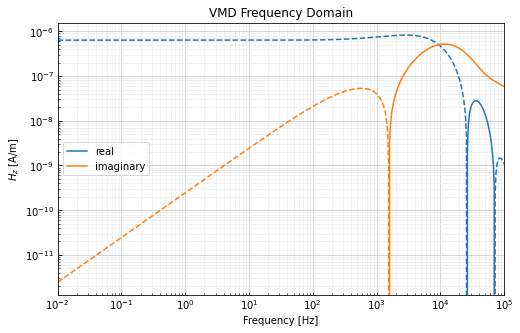

In [2]:
# VMD
emsrc_name = 'VMD'

# 層厚
thicks = [100] #空気層＋２層
# 比抵抗
res = [2e14, 10, 100] #空気層＋２層
# 送信座標
sc = [0, 0, 0]
# 受信座標
rc = [50, 0, 0]
# 測定周波数
freqs = np.logspace(-2, 5, 500)
# 地下の物性値
props = {'res' : res}

# 物理空間モデルの呼び出し
model = fwd.model(thicks)
# 物性値の割り当て
model.set_properties(**props)
# 送信ソースの呼び出しと設定
emsrc = fwd.transmitter(emsrc_name, freqs, moment=1)
# 送信ソースの設置と受信座標の設定
model.locate(emsrc, sc, rc)
# 電磁応答の取得
EMF = model.emulate(hankel_filter='werthmuller201')

# 成分抽出
hz = EMF['h_z']
re = hz.real
im = hz.imag

# 描画
fig = plt.figure(figsize=(8,5), facecolor='w')
ax = fig.add_subplot(111)
ax.plot(freqs, re, "C0-", label='real')
ax.plot(freqs, -re, "C0--")
ax.plot(freqs, im, "C1-", label='imaginary')
ax.plot(freqs, -im, "C1--")
ax.grid(which='major', c='#ccc')
ax.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('$H_z$ [A/m]')
ax.set_xlim(1e-2, 1e5)
ax.set_title(emsrc_name+' Frequency Domain')
ax.legend()
plt.savefig(emsrc_name+'_FD.png')

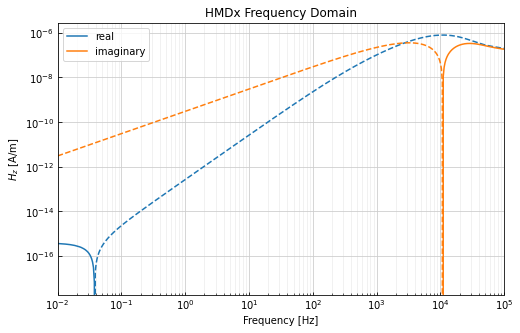

In [3]:
# VMD
emsrc_name = 'HMDx'

# 層厚
thicks = [100] #空気層＋２層
# 比抵抗
res = [2e14, 10, 100] #空気層＋２層
# 送信座標
sc = [0, 0, 0]
# 受信座標
rc = [50, 0, 0]
# 測定周波数
freqs = np.logspace(-2, 5, 500)
# 地下の物性値
props = {'res' : res}

# 物理空間モデルの呼び出し
model = fwd.model(thicks)
# 物性値の割り当て
model.set_properties(**props)
# 送信ソースの呼び出しと設定
emsrc = fwd.transmitter(emsrc_name, freqs, moment=1)
# 送信ソースの設置と受信座標の設定
model.locate(emsrc, sc, rc)
# 電磁応答の取得
EMF = model.emulate(hankel_filter='werthmuller201')

# 成分抽出
hz = EMF['h_z']
re = hz.real
im = hz.imag

# 描画
fig = plt.figure(figsize=(8,5), facecolor='w')
ax = fig.add_subplot(111)
ax.plot(freqs, re, "C0-", label='real')
ax.plot(freqs, -re, "C0--")
ax.plot(freqs, im, "C1-", label='imaginary')
ax.plot(freqs, -im, "C1--")
ax.grid(which='major', c='#ccc')
ax.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('$H_z$ [A/m]')
ax.set_xlim(1e-2, 1e5)
ax.set_title(emsrc_name+' Frequency Domain')
ax.legend()
plt.savefig(emsrc_name+'_FD.png')